In [28]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from cmath import sqrt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pyparsing import nums
plt.style.use('ggplot')

In [105]:
TLMFile = "Castemp3_14-59"
fileName = ("Results/" + TLMFile + '.csv')
layout = ['DateTime', 'RawMFCData', 'MFCData','RawPressureData', 'PressureData', 'MAPressureData', 'InputMFCValue', 'Height', 'Weight']
df = pd.read_csv(fileName, sep = ',', names=layout)
df = df[1:]
InitialPressuredf = df      ##To do the 0 analysis of pressure

for col in range(1, 9):
    df[df.columns[col]] = pd.to_numeric(df[df.columns[col]])

##Filter out times outside of the dip
Date_Time = df["DateTime"] = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f") for x in df['DateTime']]
TrialDate = "2022-11-17"
DipStart = "15:45:00.0"
DipStart = datetime.strptime(TrialDate + ' ' + DipStart, "%Y-%m-%d %H:%M:%S.%f")
DipEnd = "20:00:00.0"
DipEnd = datetime.strptime(TrialDate + ' ' + DipEnd, "%Y-%m-%d %H:%M:%S.%f")
DipFilter = 5*60

df = df[(df["DateTime"] >= DipStart) & (df["DateTime"] <= DipEnd)]
Date_Time = df["DateTime"]
CycleTime = (DipEnd - DipStart).total_seconds()
TimeDiff = [(x - DipStart).total_seconds() for x in df["DateTime"]]


df


,DateTime,RawMFCData,MFCData,RawPressureData,PressureData,MAPressureData,InputMFCValue,Height,Weight
2268,2022-11-17 15:45:00.618872,191,0.457589,2204,0.000099,0.003971,12.992969,0.005783,0.206478
2269,2022-11-17 15:45:01.772276,179,0.428840,2206,0.002102,0.003850,12.992969,0.005607,0.200195
2270,2022-11-17 15:45:02.903767,181,0.433631,2202,-0.001904,0.003479,12.992969,0.005067,0.180855
2271,2022-11-17 15:45:04.037042,198,0.474359,2208,0.004105,0.003520,12.992969,0.005125,0.182958
2272,2022-11-17 15:45:05.184672,189,0.452797,2213,0.009112,0.003880,12.992969,0.005651,0.201754
...,...,...,...,...,...,...,...,...,...
15707,2022-11-17 19:59:54.420794,180,0.431235,2302,0.098239,0.100308,12.992969,0.146072,5.499567
15708,2022-11-17 19:59:55.545736,194,0.464776,2305,0.101243,0.100368,12.992969,0.146160,5.503054
15709,2022-11-17 19:59:56.728510,188,0.450401,2306,0.102244,0.100489,12.992969,0.146336,5.510050
15710,2022-11-17 19:59:57.847686,183,0.438423,2308,0.104247,0.100731,12.992969,0.146689,5.524063


In [106]:
LCFile = "grafana_data_export (12)"
fileNameBS = ("Results/" + "British Steel/" + LCFile + '.csv')
layoutBS = ['Time', 'GrossWeight', 'NetWeight', 'TareWeight', 'CastingRate', 'Position']
 
dg = pd.read_csv(fileNameBS, sep = ';', names=layoutBS)
dg = dg[2:]
dg[dg.columns[1:]] = dg[dg.columns[1:]].apply(lambda x: x.astype(float))
dg["Time"] = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in dg['Time']]
dg = dg[(dg["Time"] >= DipStart) & (dg["Time"] <= DipEnd)]
Date_TimeBS = dg["Time"]
TimeDiffBS = [(x - DipStart).total_seconds() for x in Date_TimeBS]
dg

,Time,GrossWeight,NetWeight,TareWeight,CastingRate,Position
676,2022-11-17 15:45:00,46.250,-0.100,46.35,0.000,1.0
677,2022-11-17 15:45:20,46.250,-0.100,46.35,0.000,1.0
678,2022-11-17 15:45:40,48.488,2.138,46.35,0.000,1.0
679,2022-11-17 15:46:00,53.600,7.250,46.35,0.000,1.0
680,2022-11-17 15:46:20,58.863,12.513,46.35,0.000,1.0
...,...,...,...,...,...,...
1437,2022-11-17 19:58:40,79.688,33.338,46.35,3.538,1.0
1438,2022-11-17 19:59:00,80.100,33.750,46.35,3.538,1.0
1439,2022-11-17 19:59:20,80.487,34.138,46.35,3.538,1.0
1440,2022-11-17 19:59:40,80.850,34.500,46.35,3.538,1.0


In [107]:
MFCData = [float(x) for x in df["MFCData"]]
MFCData1 = MFCData[DipFilter:-DipFilter]
##Pressure Analysis
MAPressureData = [float(x) for x in df["MAPressureData"]]
MAPressureData1 = MAPressureData[DipFilter:-DipFilter]
PressureData = [float(x) for x in df["PressureData"]]
PressureData1 = PressureData[DipFilter:-DipFilter]
InitialData = [float(x) for x in InitialPressuredf["MAPressureData"]]
InitialData1 = InitialData[200:400]
##Weight Plotting
WeightData = [float(x) + 23.4 for x in df["Weight"]]            ##Remove Offset
WeightDataBS = [float(x) for x in dg["NetWeight"]]
##Height Plotting
HeightData = [float(x) + 0.52 for x in df["Height"]]      ##Height Offset
a = 0.20675966114731492
b = 5.089351257804871
HeightDataBS = [(-b+sqrt((b*b)+(4*a*x)))/(2*7*a) for x in WeightDataBS]


In [108]:
print("Mean: ", "{:.3f}".format(np.mean(MFCData1)))
print("Variance: ", "{:.3f}".format(np.var(MFCData1)))
print("Standard Deviation: ", "{:.3f}".format(np.std(MFCData1)))
print("Minimum: ", "{:.3f}".format(np.min(MFCData1)))
print("Maximum: ", "{:.3f}".format(np.max(MFCData1)))

Mean:  0.442
Variance:  0.000
Standard Deviation:  0.020
Minimum:  0.000
Maximum:  1.023


In [109]:
##Pressure Analysis
print("Initial Pressure, MA Pressure, Pressure")
print("Mean: ", "{:.3f}".format(np.mean(InitialData1)), ",", "{:.3f}".format(np.mean(MAPressureData1)), ",", "{:.3f}".format(np.mean(PressureData1)))
print("Variance: ", "{:.3f}".format(np.var(InitialData1)), ",", "{:.3f}".format(np.var(MAPressureData1)), ",", "{:.3f}".format(np.var(PressureData1)))
print("Standard Deviation: ", "{:.3f}".format(np.std(InitialData1)), ",", "{:.3f}".format(np.std(MAPressureData1)), ",", "{:.3f}".format(np.std(PressureData1)))
print("Minimum: ", "{:.3f}".format(np.min(InitialData1)), ",", "{:.3f}".format(np.min(MAPressureData1)), ",", "{:.3f}".format(np.min(PressureData1)))
print("Maximum: ", "{:.3f}".format(np.max(InitialData1)), ",", "{:.3f}".format(np.max(MAPressureData1)), ",", "{:.3f}".format(np.max(PressureData1)))

Initial Pressure, MA Pressure, Pressure
Mean:  0.004 , 0.087 , 0.087
Variance:  0.000 , 0.001 , 0.001
Standard Deviation:  0.001 , 0.031 , 0.032
Minimum:  0.001 , 0.002 , -0.030
Maximum:  0.008 , 0.188 , 0.271


[0.089225957519531, 0.096235927734375, 0.0982387763671873, 0.0932316547851562, 0.0882245332031248, 0.0802131386718749, 0.0912288061523436, 0.0912288061523436, 0.0952345034179686, 0.1012430493164061, 0.0902273818359374, 0.096235927734375, 0.0902273818359374, 0.0912288061523436, 0.0942330791015624, 0.0972373520507812, 0.0952345034179686, 0.0912288061523436, 0.0922302304687498, 0.0882245332031248]
0.0802131386718749
0.1012430493164061
[0.471963134765625, 0.41686083984375, 0.40727783203125, 0.4408183593750001, 0.4408183593750001, 0.443214111328125, 0.42644384765625, 0.4408183593750001, 0.45519287109375, 0.45519287109375, 0.428839599609375, 0.438422607421875, 0.4312353515625, 0.433631103515625, 0.452797119140625, 0.42644384765625, 0.44560986328125, 0.4480056152343751, 0.40727783203125, 0.424048095703125]
0.40727783203125
0.471963134765625
8695
7650.0


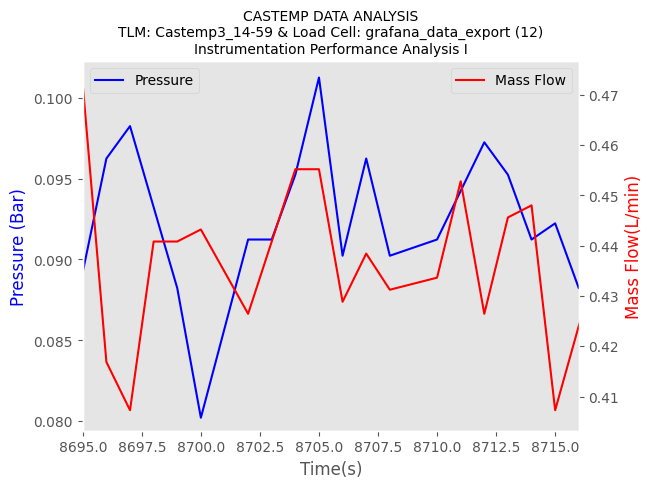

In [146]:
# First figure: Pressure against Mass Flow
fig1, ax1 = plt.subplots()
# Pressure formatting
TimeDiff = [int(x) for x in TimeDiff]
ax1.set_title("CASTEMP DATA ANALYSIS\n" + "TLM: " + TLMFile + " & " + "Load Cell: " + LCFile + '\n' + "Instrumentation Performance Analysis I", fontsize=10, ha = 'center')
ax1.plot(TimeDiff, PressureData, 'b', label = 'Pressure')
ax1.set_ylabel('Pressure (Bar)', color='b')
# Mass Flow formatting
ax2 = ax1.twinx()
ax2.plot(TimeDiff, MFCData, 'r-', label = 'Mass Flow')
ax2.set_ylabel('Mass Flow(L/min)', color='r')
# Graph formatting
List = TimeDiff[int((CycleTime/2)-10):int((CycleTime/2)+10)]
ax1.set_xlim(List[0], List[-1])
ax1.set_ylim([0.99*np.min(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)]), 1.01*np.max(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)])])
ax2.set_ylim([0.99*np.min(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)]), 1.01*np.max(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)])])
ax1.grid(which='both', visible=False)
ax2.grid(which='both', visible=False)
ax1.set_xlabel('Time(s)')
ax1.legend(loc='upper left')
ax2.legend()

print((PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print(np.min(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print(np.max(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print((MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print(np.min(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print(np.max(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
List = TimeDiff[int((CycleTime/2)-10):int((CycleTime/2)+10)]
print(List[0])
print(CycleTime/2)

Text(0.5, 1.0, 'Instrumentation Performance Analysis II')

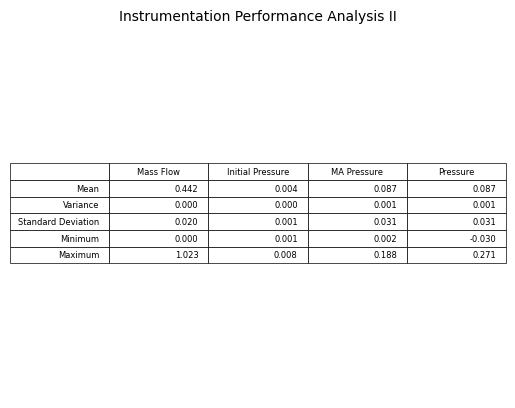

In [147]:
# Fourth figure: Mass Flow table
fig2, ax3 = plt.subplots()

MFCData = [float(x) for x in df["MFCData"]]
MFCData1 = MFCData[DipFilter:int(CycleTime)]
MAPressureData = [float(x) for x in df["MAPressureData"]]
MAPressureData1 = MAPressureData[DipFilter:int(CycleTime)]
PressureData = [float(x) for x in df["PressureData"]]
PressureData1 = PressureData[DipFilter:int(CycleTime)]
InitialData = [float(x) for x in InitialPressuredf["MAPressureData"]]
InitialData1 = InitialData[200:400]

# Calculate statistical values
means = ['Mean', "{:.3f}".format(np.mean(MFCData1)), "{:.3f}".format(np.mean(InitialData1)),"{:.3f}".format(np.mean(MAPressureData1)), "{:.3f}".format(np.mean(PressureData1))]
variances = ['Variance', "{:.3f}".format(np.var(MFCData1)), "{:.3f}".format(np.var(InitialData1)), "{:.3f}".format(np.var(MAPressureData1)), "{:.3f}".format(np.var(PressureData1))]
stddevs = ['Standard Deviation', "{:.3f}".format(np.std(MFCData1)), "{:.3f}".format(np.std(InitialData1)), "{:.3f}".format(np.std(MAPressureData1)), "{:.3f}".format(np.std(PressureData1))]
mins = ['Minimum', "{:.3f}".format(np.min(MFCData1)), "{:.3f}".format(np.min(InitialData1)), "{:.3f}".format(np.min(MAPressureData1)), "{:.3f}".format(np.min(PressureData1))]
maxs = ['Maximum', "{:.3f}".format(np.max(MFCData1)), "{:.3f}".format(np.max(InitialData1)), "{:.3f}".format(np.max(MAPressureData1)), "{:.3f}".format(np.max(PressureData1))]

# Create rows for table
rows = [means, variances, stddevs, mins, maxs]

# Create and display table
table = ax3.table(cellText=rows, colLabels=[" ", "Mass Flow", "Initial Pressure", "MA Pressure", "Pressure"], loc='center')
ax3.axis("off")
ax3.set_title("Instrumentation Performance Analysis II", fontsize=10, ha = 'center')

Text(0.5, 1.0, 'Weight Comparison')

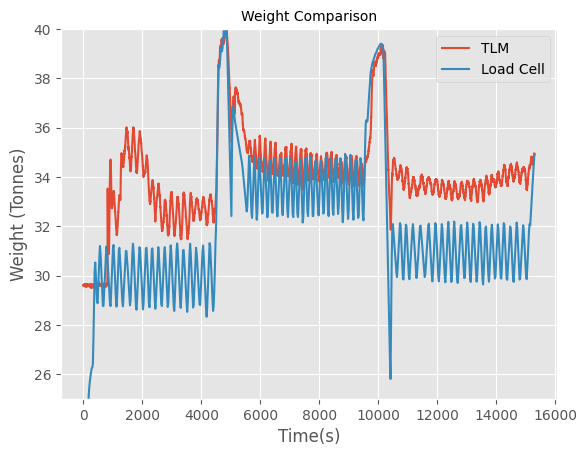

In [148]:
# Second figure: Weight Plotting
fig3, ax4 = plt.subplots()
WeightData = [float(x) + 29.4 for x in df["Weight"]]            ##Remove Offset
WeightDataBS = [float(x) for x in dg["NetWeight"]]
# Formatting
ax4.set_ylim([25, 40])
ax4.set_xlabel('Time(s)')
ax4.set_ylabel('Weight (Tonnes)')
# Plot
ax4.plot(TimeDiff, WeightData, label = 'TLM')
ax4.plot(TimeDiffBS, WeightDataBS, label = 'Load Cell')
ax4.legend()
ax4.set_title("Weight Comparison", fontsize=10, ha = 'center')

C:\Users\f87580\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Height Comparison')

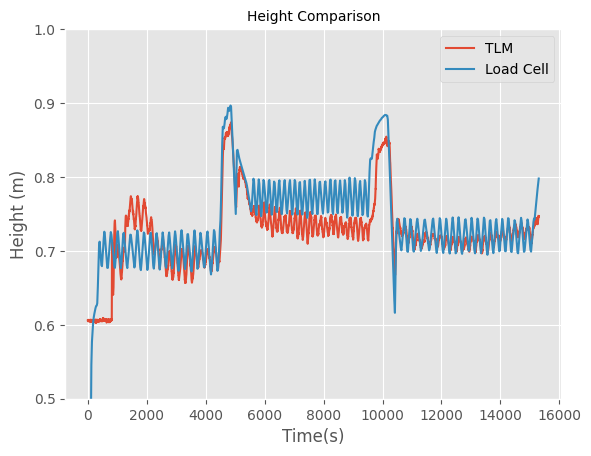

In [149]:
# Third figure: Height Plotting
fig4, ax5 = plt.subplots()

HeightData = [float(x) + 0.6 for x in df["Height"]]      ##Height Offset
a = 0.20675966114731492
b = 5.089351257804871
HeightDataBS = [(-b+sqrt((b*b)+(4*a*x)))/(2*7*a) for x in WeightDataBS]

# Formatting
ax5.set_xlabel('Time(s)')
ax5.set_ylabel('Height (m)')
ax5.set_ylim([0.5, 1])
ax5.plot(TimeDiff, HeightData, label = 'TLM')
ax5.plot(TimeDiffBS, HeightDataBS, label = 'Load Cell')
ax5.legend()
ax5.set_title("Height Comparison", fontsize=10, ha = 'center')

In [150]:
print((PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print(np.max(PressureData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print(np.min(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))
print(np.max(MFCData[int((CycleTime/2)-10):int((CycleTime/2)+10)]))

[0.089225957519531, 0.096235927734375, 0.0982387763671873, 0.0932316547851562, 0.0882245332031248, 0.0802131386718749, 0.0912288061523436, 0.0912288061523436, 0.0952345034179686, 0.1012430493164061, 0.0902273818359374, 0.096235927734375, 0.0902273818359374, 0.0912288061523436, 0.0942330791015624, 0.0972373520507812, 0.0952345034179686, 0.0912288061523436, 0.0922302304687498, 0.0882245332031248]
0.1012430493164061
0.40727783203125
0.471963134765625
